In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
# initializing and refining the data
energy = pd.read_csv('energy.csv').transpose()
energy.columns = [100, 110, 130, 160, 200]
energy.drop('Unnamed: 0', inplace=True)
energy.index = np.linspace(0.1, 0.7, 80)

magnet = pd.read_csv('magnet.csv').transpose()
magnet.columns = [100, 110, 130, 160, 200]
magnet.drop('Unnamed: 0', inplace=True)
magnet.index = np.linspace(0.1, 0.7, 80)

ksi = pd.read_csv('ksi.csv').transpose()
ksi.columns = [100, 110, 130, 160, 200]
ksi.drop('Unnamed: 0', inplace=True)
ksi.index = np.linspace(0.1, 0.7, 80)

heat_cap = pd.read_csv('heat_cap.csv').transpose()
heat_cap.columns = [100, 110, 130, 160, 200]
heat_cap.drop('Unnamed: 0', inplace=True)
heat_cap.index = np.linspace(0.1, 0.7, 80)

spin_cor = pd.read_csv('spin_cor.csv').transpose()
spin_cor.columns = [100, 110, 130, 160, 200]
spin_cor.drop('Unnamed: 0', inplace=True)
spin_cor.index = np.linspace(0.1, 0.7, 80)

spin_cor_error = pd.read_csv('spin_cor_error.csv').transpose()
spin_cor_error.columns = [100, 110, 130, 160, 200]
spin_cor_error.drop('Unnamed: 0', inplace=True)
spin_cor_error.index = np.linspace(0.1, 0.7, 80)


# Plotting...

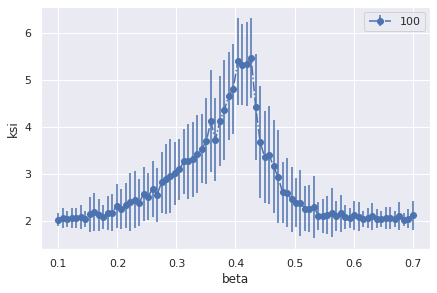

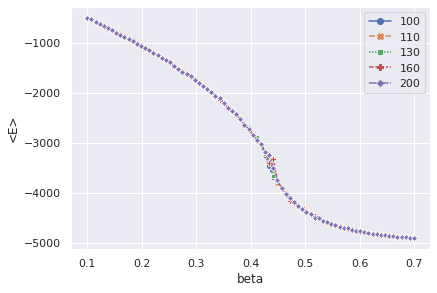

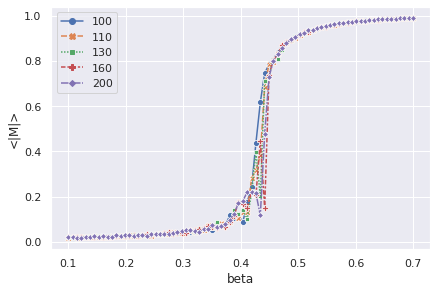

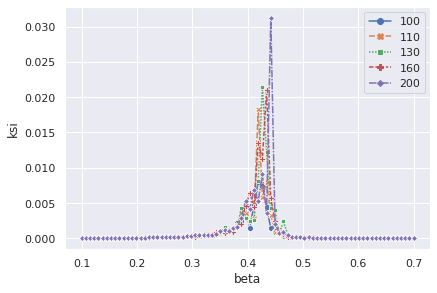

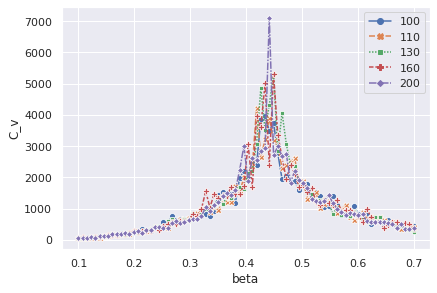

In [16]:

sns.set_theme()

plt.errorbar(x=np.linspace(0.1, 0.7, 80), y=spin_cor[100],
             yerr=spin_cor_error[100], marker='o', ls='-.', label='100')
plt.tight_layout()
plt.legend()
plt.xlabel("beta")
plt.ylabel("ksi")
plt.savefig("spin_cor_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()


sns.lineplot(data=energy, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("<E>")
plt.savefig("energy_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

sns.lineplot(data=magnet, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("<|M|>")
plt.savefig("magnet_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

sns.lineplot(data=ksi, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("ksi")
plt.savefig("ksi_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

sns.lineplot(data=heat_cap, markers=True)
plt.tight_layout()
plt.xlabel("beta")
plt.ylabel("C_v")
plt.savefig("heat_cap_plot.jpg", bbox_inches='tight', dpi=300)
plt.show()

# Finding The critical Temp

In [141]:
energy

,100,110,130,160,200
0.100000,-498.12,-516.52,-512.88,-502.16,-513.56
0.115385,-598.32,-594.56,-588.96,-583.16,-591.24
0.130769,-671.36,-681.92,-652.36,-672.08,-653.60
0.146154,-758.20,-745.68,-758.32,-754.76,-768.16
0.161538,-855.16,-839.12,-837.52,-849.68,-862.36
0.176923,-945.28,-929.64,-923.08,-932.60,-926.80
0.192308,-1011.88,-1031.60,-1011.84,-1018.04,-1019.68
0.207692,-1115.32,-1099.88,-1112.12,-1110.40,-1131.76
0.223077,-1210.84,-1211.24,-1211.28,-1220.88,-1221.80
0.238462,-1324.36,-1312.44,-1318.44,-1318.60,-1323.56
